# Final Project Draft Code: (From Sarah)
## Neural Networks + feature selection/regularization

Using SDI and EJI Index, output is F_ASTHMA (EJI)
* "F_ASTHMA" is a flag indicating tracts greater than 0.6666 percentile rank with asthma, values are 0 or 1

Still working on...
* What variables? 

In [1]:
import csv
import pandas as pd

In [2]:
# EJI data, read in CSV
EJI_data = pd.read_csv('United States.csv')

print(EJI_data.head(5))
print(len(EJI_data))
print(EJI_data.columns)

   STATEFP  COUNTYFP  TRACTCE              AFFGEOID       GEOID   NAME  \
0        1         1    20100  1400000US01001020100  1001020100  201.0   
1        1         1    20200  1400000US01001020200  1001020200  202.0   
2        1         1    20300  1400000US01001020300  1001020300  203.0   
3        1         1    20400  1400000US01001020400  1001020400  204.0   
4        1         1    20500  1400000US01001020500  1001020500  205.0   

    COUNTY StateAbbr StateDesc                                   Location  \
0  Autauga        AL   Alabama  Census Tract 201, Autauga County, Alabama   
1  Autauga        AL   Alabama  Census Tract 202, Autauga County, Alabama   
2  Autauga        AL   Alabama  Census Tract 203, Autauga County, Alabama   
3  Autauga        AL   Alabama  Census Tract 204, Autauga County, Alabama   
4  Autauga        AL   Alabama  Census Tract 205, Autauga County, Alabama   

   ...  EP_BPHIGH  EP_ASTHMA  EP_CANCER  EP_MHLTH  EP_DIABETES  EPL_BPHIGH  \
0  ...       3

In [3]:
# SDI data, read in CSV -- census level!
SDI_data = pd.read_csv('rgcsdi-2015-2019-censustract.csv')

print(SDI_data.head(5))
print(len(SDI_data))

   CENSUSTRACT_FIPS  CensusTract_population  SDI_score  \
0        1001020100                    1993       52.0   
1        1001020200                    1959       74.0   
2        1001020300                    3507       71.0   
3        1001020400                    3878       22.0   
4        1001020500                   10596       59.0   

   PovertyLT100_FPL_score  Single_Parent_Fam_score  Education_LT12years_score  \
0                    71.0                     50.0                       64.0   
1                    77.0                     26.0                       71.0   
2                    73.0                     68.0                       71.0   
3                    18.0                     33.0                       44.0   
4                    67.0                     42.0                       43.0   

   HHNo_Vehicle_score  HHRenter_Occupied_score  HHCrowding_score  \
0                11.0                     38.0               1.0   
1                86.0       

In [4]:
# Find values in EJI_data['GEOID'] that are not in SDI_data['CENSUSTRACT_FIPS']

EJI_values_not_in_SDI = EJI_data['GEOID'][~EJI_data['GEOID'].
                                                  isin(SDI_data['CENSUSTRACT_FIPS'])]

# Finding values in SDIdata['CENSUSTRACT_FIPS'] that are not in EJIdata['GEOID']
SDI_values_not_in_EJI = SDI_data['CENSUSTRACT_FIPS'][~SDI_data['CENSUSTRACT_FIPS'].
                                                             isin(EJI_data['GEOID'])]

# Print the results
print("Values in GEOID but not in CENSUSTRACT_FIPS:",EJI_values_not_in_SDI.tolist())
print(len(EJI_values_not_in_SDI))

print("Values in CENSUSTRACT_FIPS but not in GEOID:",SDI_values_not_in_EJI.tolist())
print(len(SDI_values_not_in_EJI))


Values in GEOID but not in CENSUSTRACT_FIPS: [11001000100, 11001000701, 11001000801, 11001000901, 11001001001, 11001001302, 11001002502, 11001002701, 11001003700, 11001003800, 11001003900, 11001004400, 11001004701, 11001005002, 11001005201, 11001005301, 11001005500, 11001005600, 11001005800, 11001006202, 11001007200, 11001009501, 11001010200, 11001010600, 11001011000]
25
Values in CENSUSTRACT_FIPS but not in GEOID: [1003990000, 2013000100, 2016000100, 2016000200, 2020000101, 2020000102, 2020000201, 2020000202, 2020000203, 2020000204, 2020000300, 2020000400, 2020000500, 2020000600, 2020000701, 2020000702, 2020000703, 2020000801, 2020000802, 2020000901, 2020000902, 2020001000, 2020001100, 2020001200, 2020001300, 2020001400, 2020001500, 2020001601, 2020001602, 2020001701, 2020001702, 2020001731, 2020001732, 2020001801, 2020001802, 2020001900, 2020002000, 2020002100, 2020002201, 2020002202, 2020002301, 2020002302, 2020002303, 2020002400, 2020002501, 2020002502, 2020002601, 2020002602, 2020

In [5]:
# Drop asthma related columns from EJI
EJI_data.drop("EP_ASTHMA", axis=1, inplace=True)
EJI_data.drop("EPL_ASTHMA", axis=1, inplace=True)

EJI_data


,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,COUNTY,StateAbbr,StateDesc,Location,...,EP_MOBILE,EP_GROUPQ,EP_BPHIGH,EP_CANCER,EP_MHLTH,EP_DIABETES,EPL_BPHIGH,EPL_CANCER,EPL_DIABETES,EPL_MHLTH
0,1,1,20100,1400000US01001020100,1001020100,201.00,Autauga,AL,Alabama,"Census Tract 201, Autauga County, Alabama",...,17.7,0.0,34.9,6.7,15.1,10.9,0.6708,0.4939,0.5229,0.6272
1,1,1,20200,1400000US01001020200,1001020200,202.00,Autauga,AL,Alabama,"Census Tract 202, Autauga County, Alabama",...,1.5,10.7,42.6,5.6,17.4,14.4,0.9129,0.2747,0.8297,0.8245
2,1,1,20300,1400000US01001020300,1001020300,203.00,Autauga,AL,Alabama,"Census Tract 203, Autauga County, Alabama",...,1.3,0.0,38.4,6.8,16.7,12.1,0.8154,0.5160,0.6563,0.7746
3,1,1,20400,1400000US01001020400,1001020400,204.00,Autauga,AL,Alabama,"Census Tract 204, Autauga County, Alabama",...,0.0,0.0,38.2,8.5,13.2,11.2,0.8087,0.8794,0.5598,0.4088
4,1,1,20500,1400000US01001020500,1001020500,205.00,Autauga,AL,Alabama,"Census Tract 205, Autauga County, Alabama",...,0.4,1.7,33.4,6.4,14.0,9.4,0.5882,0.4287,0.3319,0.5033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72328,56,43,200,1400000US56043000200,56043000200,2.00,Washakie,WY,Wyoming,"Census Tract 2, Washakie County, Wyoming",...,21.0,2.0,34.1,8.2,12.2,10.5,0.6276,0.8343,0.4731,0.2921
72329,56,43,301,1400000US56043000301,56043000301,3.01,Washakie,WY,Wyoming,"Census Tract 3.01, Washakie County, Wyoming",...,4.3,1.2,32.1,7.2,13.3,9.4,0.5115,0.6113,0.3319,0.4205
72330,56,43,302,1400000US56043000302,56043000302,3.02,Washakie,WY,Wyoming,"Census Tract 3.02, Washakie County, Wyoming",...,2.6,2.6,36.4,8.7,12.5,11.7,0.7415,0.9013,0.6162,0.3268
72331,56,45,951100,1400000US56045951100,56045951100,9511.00,Weston,WY,Wyoming,"Census Tract 9511, Weston County, Wyoming",...,25.5,8.2,31.6,7.4,13.1,10.5,0.4822,0.6609,0.4731,0.3970


In [6]:
# Just looking at missing data in the unmerged
# SDI and EJI datasets
EJI_missing = EJI_data.isnull().sum()
print(f"EJI Missing: {EJI_missing}")

SDI_missing = SDI_data.isnull().sum()
print(f"SDI Missing: {SDI_missing}")

EJI Missing: STATEFP           0
COUNTYFP          0
TRACTCE           0
AFFGEOID          0
GEOID             0
               ... 
EP_DIABETES     480
EPL_BPHIGH      480
EPL_CANCER      480
EPL_DIABETES    480
EPL_MHLTH       480
Length: 116, dtype: int64
SDI Missing: CENSUSTRACT_FIPS               0
CensusTract_population         0
SDI_score                    646
PovertyLT100_FPL_score       646
Single_Parent_Fam_score      646
Education_LT12years_score    646
HHNo_Vehicle_score           646
HHRenter_Occupied_score      646
HHCrowding_score             646
Nonemployed_score            646
sdi                          646
pct_Poverty_LT100              0
pct_Single_Parent_Fam          0
pct_Education_LT12years        0
pct_NonEmployed                0
pctHH_No_Vehicle               0
pctHH_Renter_Occupied          0
pctHH_Crowding                 0
dtype: int64


# Merge SDI and EJI data - still Sarah's code

In [7]:
# Merge data frames, on CENSUSTRACTS_FIP and GEOID

EJI_data['GEOID'] = EJI_data['GEOID'].astype(str).str.strip()
SDI_data['CENSUSTRACT_FIPS'] = SDI_data['CENSUSTRACT_FIPS'].astype(str).str.strip()

merged_df = pd.merge(
    EJI_data, 
    SDI_data, 
    left_on='GEOID', 
    right_on='CENSUSTRACT_FIPS', 
    how='left') 
# did a left join because don't need the 723 values in SDI data
# that don't match up with GEOIDs (said in her email)

print(merged_df.head())
print(len(merged_df))

#merged_df.to_csv("/Users/sarahcourtney/Documents/classes/data_mining/final_project/out.csv")

   STATEFP  COUNTYFP  TRACTCE              AFFGEOID       GEOID   NAME  \
0        1         1    20100  1400000US01001020100  1001020100  201.0   
1        1         1    20200  1400000US01001020200  1001020200  202.0   
2        1         1    20300  1400000US01001020300  1001020300  203.0   
3        1         1    20400  1400000US01001020400  1001020400  204.0   
4        1         1    20500  1400000US01001020500  1001020500  205.0   

    COUNTY StateAbbr StateDesc                                   Location  \
0  Autauga        AL   Alabama  Census Tract 201, Autauga County, Alabama   
1  Autauga        AL   Alabama  Census Tract 202, Autauga County, Alabama   
2  Autauga        AL   Alabama  Census Tract 203, Autauga County, Alabama   
3  Autauga        AL   Alabama  Census Tract 204, Autauga County, Alabama   
4  Autauga        AL   Alabama  Census Tract 205, Autauga County, Alabama   

   ...  HHCrowding_score  Nonemployed_score       sdi  pct_Poverty_LT100  \
0  ...          

In [8]:
# Reorganize columns
merged_df.insert(4, 'CENSUSTRACT_FIPS', merged_df.pop('CENSUSTRACT_FIPS'))
merged_df.insert(5, 'CensusTract_population', merged_df.pop('CensusTract_population'))

# Print list of columns
print(merged_df.columns.tolist())


# Make them the same type (GEOID, Censustract) to string
merged_df['GEOID'] = merged_df['GEOID'].astype(str).str.strip()
SDI_data['CENSUSTRACT_FIPS'] = SDI_data['CENSUSTRACT_FIPS'].astype(str).str.strip()

print(merged_df['GEOID'].head())
print(SDI_data['CENSUSTRACT_FIPS'].head())

['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'CENSUSTRACT_FIPS', 'CensusTract_population', 'GEOID', 'NAME', 'COUNTY', 'StateAbbr', 'StateDesc', 'Location', 'E_TOTPOP', 'M_TOTPOP', 'E_DAYPOP', 'SPL_EJI', 'RPL_EJI', 'SPL_SER', 'RPL_SER', 'EPL_OZONE', 'EPL_PM', 'EPL_DSLPM', 'EPL_TOTCR', 'SPL_EBM_THEME1', 'RPL_EBM_DOM1', 'EPL_NPL', 'EPL_TRI', 'EPL_TSD', 'EPL_RMP', 'EPL_COAL', 'EPL_LEAD', 'SPL_EBM_THEME2', 'RPL_EBM_DOM2', 'EPL_PARK', 'EPL_HOUAGE', 'EPL_WLKIND', 'SPL_EBM_THEME3', 'RPL_EBM_DOM3', 'EPL_RAIL', 'EPL_ROAD', 'EPL_AIRPRT', 'SPL_EBM_THEME4', 'RPL_EBM_DOM4', 'EPL_IMPWTR', 'SPL_EBM_THEME5', 'RPL_EBM_DOM5', 'SPL_EBM', 'RPL_EBM', 'EPL_MINRTY', 'SPL_SVM_DOM1', 'RPL_SVM_DOM1', 'EPL_POV200', 'EPL_NOHSDP', 'EPL_UNEMP', 'EPL_RENTER', 'EPL_HOUBDN', 'EPL_UNINSUR', 'EPL_NOINT', 'SPL_SVM_DOM2', 'RPL_SVM_DOM2', 'EPL_AGE65', 'EPL_AGE17', 'EPL_DISABL', 'EPL_LIMENG', 'SPL_SVM_DOM3', 'RPL_SVM_DOM3', 'EPL_MOBILE', 'EPL_GROUPQ', 'SPL_SVM_DOM4', 'RPL_SVM_DOM4', 'SPL_SVM', 'RPL_SVM', 'F_BPHIGH', 'F_AST

In [9]:
merged_df

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,CENSUSTRACT_FIPS,CensusTract_population,GEOID,NAME,COUNTY,StateAbbr,...,HHCrowding_score,Nonemployed_score,sdi,pct_Poverty_LT100,pct_Single_Parent_Fam,pct_Education_LT12years,pct_NonEmployed,pctHH_No_Vehicle,pctHH_Renter_Occupied,pctHH_Crowding
0,1,1,20100,1400000US01001020100,1001020100,1993.0,1001020100,201.00,Autauga,AL,...,1.0,74.0,0.019577,0.166583,0.116402,0.125472,0.454829,0.009873,0.236953,0.000000
1,1,1,20200,1400000US01001020200,1001020200,1959.0,1001020200,202.00,Autauga,AL,...,44.0,96.0,0.716664,0.191340,0.071618,0.148254,0.779101,0.142442,0.373547,0.015988
2,1,1,20300,1400000US01001020300,1001020300,3507.0,1001020300,203.00,Autauga,AL,...,61.0,44.0,0.594259,0.172512,0.160775,0.149701,0.332575,0.046324,0.353676,0.027941
3,1,1,20400,1400000US01001020400,1001020400,3878.0,1001020400,204.00,Autauga,AL,...,27.0,65.0,-0.867549,0.046416,0.085202,0.081583,0.411869,0.012537,0.208955,0.007164
4,1,1,20500,1400000US01001020500,1001020500,10596.0,1001020500,205.00,Autauga,AL,...,21.0,31.0,0.211409,0.151626,0.100202,0.079653,0.292953,0.044390,0.516841,0.004684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72328,56,43,200,1400000US56043000200,56043000200,3051.0,56043000200,2.00,Washakie,WY,...,67.0,79.0,-0.473180,0.081578,0.061140,0.088378,0.490253,0.022013,0.177673,0.033805
72329,56,43,301,1400000US56043000301,56043000301,2482.0,56043000301,3.01,Washakie,WY,...,44.0,5.0,0.145855,0.085726,0.228070,0.139634,0.193894,0.087611,0.318584,0.015929
72330,56,43,302,1400000US56043000302,56043000302,2494.0,56043000302,3.02,Washakie,WY,...,28.0,66.0,-0.125254,0.153465,0.056761,0.084601,0.413064,0.038422,0.212876,0.007269
72331,56,45,951100,1400000US56045951100,56045951100,3294.0,56045951100,9511.00,Weston,WY,...,49.0,83.0,-0.112173,0.171240,0.103743,0.066023,0.521434,0.023392,0.150585,0.019006


In [10]:
# Check for missing values in the entire dataset
# Display columns with missing values

merged_missing = merged_df.isnull().sum()
print("columns with missing values:\n",merged_missing[merged_missing > 0], "\n")

columns with missing values:
 CENSUSTRACT_FIPS            25
CensusTract_population      25
StateAbbr                  480
SPL_EJI                    656
RPL_EJI                    656
                          ... 
pct_Education_LT12years     25
pct_NonEmployed             25
pctHH_No_Vehicle            25
pctHH_Renter_Occupied       25
pctHH_Crowding              25
Length: 100, dtype: int64 



# Geographical Imputations

Just need to impute data for the 25 DC missing ones.. 
Don't understand why need to use censusdata and function below if these missing values are from EJI data, and so already have that... 

In [11]:
# Verifying missing values are in merged_df, 
# with geographic info
EJI_list = EJI_values_not_in_SDI.tolist()

print(EJI_list)

str_EJI_list = [str(item) for item in EJI_values_not_in_SDI]
print(str_EJI_list)

dc_rows = merged_df[merged_df['GEOID'].isin(str_EJI_list)]
print(dc_rows)


[11001000100, 11001000701, 11001000801, 11001000901, 11001001001, 11001001302, 11001002502, 11001002701, 11001003700, 11001003800, 11001003900, 11001004400, 11001004701, 11001005002, 11001005201, 11001005301, 11001005500, 11001005600, 11001005800, 11001006202, 11001007200, 11001009501, 11001010200, 11001010600, 11001011000]
['11001000100', '11001000701', '11001000801', '11001000901', '11001001001', '11001001302', '11001002502', '11001002701', '11001003700', '11001003800', '11001003900', '11001004400', '11001004701', '11001005002', '11001005201', '11001005301', '11001005500', '11001005600', '11001005800', '11001006202', '11001007200', '11001009501', '11001010200', '11001010600', '11001011000']
       STATEFP  COUNTYFP  TRACTCE              AFFGEOID CENSUSTRACT_FIPS  \
13728       11         1      100  1400000US11001000100              NaN   
13736       11         1      701  1400000US11001000701              NaN   
13738       11         1      801  1400000US11001000801              N

In [12]:
import censusdata

# Need to find the 24 missing are from
# so then can do that imputation, based on county ... 

# Confused why we need this?

# Function from Week 11 Outline
def get_state_county_info(tract):
    # Ensure the tract is treated as a string for slicing
    tract = str(tract)
    state_fips = tract[:2]
    county_fips = tract[2:5]

    try:
        # Retrieve state name
        state_info = censusdata.geographies(
            censusdata.censusgeo([('state', state_fips)]),
            'acs5', 2021
        )
        state_name = list(state_info.keys())[0] if state_info else 'UnknownState'

        # Retrieve county name
        county_info = censusdata.geographies(
            censusdata.censusgeo([('state', state_fips), 
                                  ('county', county_fips)]), 'acs5', 2021
        )
        county_name = list(county_info.keys())[0] if county_info else 'UnknownCounty'
        
        return {
            'tract': tract,
            'state': state_name,
            'county': county_name
        }
    except Exception as e:
        return {
            'tract': tract,
            'state': 'Error',
            'county': 'Error',
            'error': str(e)
        }  

 
# Create a DataFrame by evaluating each tract
results = [get_state_county_info(tract) for tract in 
           EJI_values_not_in_SDI]
decoded_df = pd.DataFrame(results)

# Display the df
print(decoded_df)

          tract                 state  \
0   11001000100  District of Columbia   
1   11001000701  District of Columbia   
2   11001000801  District of Columbia   
3   11001000901  District of Columbia   
4   11001001001  District of Columbia   
5   11001001302  District of Columbia   
6   11001002502  District of Columbia   
7   11001002701  District of Columbia   
8   11001003700  District of Columbia   
9   11001003800  District of Columbia   
10  11001003900  District of Columbia   
11  11001004400  District of Columbia   
12  11001004701  District of Columbia   
13  11001005002  District of Columbia   
14  11001005201  District of Columbia   
15  11001005301  District of Columbia   
16  11001005500  District of Columbia   
17  11001005600  District of Columbia   
18  11001005800  District of Columbia   
19  11001006202  District of Columbia   
20  11001007200  District of Columbia   
21  11001009501  District of Columbia   
22  11001010200  District of Columbia   
23  11001010600 

In [13]:
# Don't know why need to do this...

# Need to get that decoded_df info into merged_df
    # actually don't need to do this if only need 25 from DC

# Make sure are the same type ... 
merged_df['GEOID'] = merged_df['GEOID'].astype(str)
decoded_df['tract'] = decoded_df['tract'].astype(str)

merged_df['StateDesc'] = merged_df['StateDesc'].astype(str)
decoded_df['state'] = decoded_df['state'].astype(str)

merged_df['COUNTY'] = merged_df['COUNTY'].astype(str)
decoded_df['county'] = decoded_df['county'].astype(str)

# List of missing tracts (ones w/ error from censusdata)
#missing_tracts = [tract for tract in EJI_values_not_in_SDI if tract not in decoded_df['tract'].values]
#print("Missing tracts:", missing_tracts)
#print(len(missing_tracts))

# Add 0 to census data so it matches with GEOID
    #tract ids are 11 values...
#EJI_values_not_in_SDI = [str(tract).zfill(11) for tract in SDI_values_not_in_EJI]
#print(EJI_values_not_in_SDI)

# Fill in values of COUNTY for SDI data!!!
#for sdi_tract in SDI_values_not_in_EJI:
    #mask = merged_df['CENSUSTRACT_FIPS'] == sdi_tract

    #if sdi_tract in decoded_df['tract'].values:
        
        #merged_df.loc[mask, 'GEOID']= decoded_df.loc[decoded_df['tract'] == sdi_tract, 'tract'].values[0]
        #merged_df.loc[mask, 'COUNTY'] = decoded_df.loc[decoded_df['tract'] == sdi_tract, 'county'].values[0]
        #merged_df.loc[mask, 'StatesDesc'] = decoded_df.loc[decoded_df['tract'] == sdi_tract, 'state'].values[0]


In [14]:
# Also don't think need now

# Edit original EJI 'COUNTY' rows
    # so won't have County, State in it yet
    # to have that 
    # because new SDI filled in ones do
#mask = ~merged_df['COUNTY'].str.contains(',', na=False)

#merged_df.loc[mask, 'COUNTY'] = merged_df.loc[mask, 'COUNTY'] + " County, " + merged_df.loc[mask, 'StateDesc']

#print(merged_df[['COUNTY']].head())


In [15]:
col_list = merged_df.columns
print(col_list)

print(len(col_list))

for item in col_list:
    print(item)

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'CENSUSTRACT_FIPS',
       'CensusTract_population', 'GEOID', 'NAME', 'COUNTY', 'StateAbbr',
       ...
       'HHCrowding_score', 'Nonemployed_score', 'sdi', 'pct_Poverty_LT100',
       'pct_Single_Parent_Fam', 'pct_Education_LT12years', 'pct_NonEmployed',
       'pctHH_No_Vehicle', 'pctHH_Renter_Occupied', 'pctHH_Crowding'],
      dtype='object', length=134)
134
STATEFP
COUNTYFP
TRACTCE
AFFGEOID
CENSUSTRACT_FIPS
CensusTract_population
GEOID
NAME
COUNTY
StateAbbr
StateDesc
Location
E_TOTPOP
M_TOTPOP
E_DAYPOP
SPL_EJI
RPL_EJI
SPL_SER
RPL_SER
EPL_OZONE
EPL_PM
EPL_DSLPM
EPL_TOTCR
SPL_EBM_THEME1
RPL_EBM_DOM1
EPL_NPL
EPL_TRI
EPL_TSD
EPL_RMP
EPL_COAL
EPL_LEAD
SPL_EBM_THEME2
RPL_EBM_DOM2
EPL_PARK
EPL_HOUAGE
EPL_WLKIND
SPL_EBM_THEME3
RPL_EBM_DOM3
EPL_RAIL
EPL_ROAD
EPL_AIRPRT
SPL_EBM_THEME4
RPL_EBM_DOM4
EPL_IMPWTR
SPL_EBM_THEME5
RPL_EBM_DOM5
SPL_EBM
RPL_EBM
EPL_MINRTY
SPL_SVM_DOM1
RPL_SVM_DOM1
EPL_POV200
EPL_NOHSDP
EPL_UNEMP
EPL_RENTER
EPL_HO

In [16]:
# Get columns need to impute values for, numeric
columns = merged_df.columns[12:].tolist()
print(columns)

# Imputate by county average
    # Because only one row of each census tract,
    # so if trying to find mean for each census tract for values missing
    # in that census tract ... doesn't make sense

for col in columns:  
    merged_df[col] = merged_df.groupby('COUNTY')[col].transform(lambda x: x.fillna(x.mean()))
    merged_df[col] = merged_df.groupby('StateDesc')[col].transform(lambda x: x.fillna(x.mean()))

merged_df['F_ASTHMA'] = merged_df.groupby('COUNTY')[col].transform(lambda x: x.fillna(x.mode()))

['E_TOTPOP', 'M_TOTPOP', 'E_DAYPOP', 'SPL_EJI', 'RPL_EJI', 'SPL_SER', 'RPL_SER', 'EPL_OZONE', 'EPL_PM', 'EPL_DSLPM', 'EPL_TOTCR', 'SPL_EBM_THEME1', 'RPL_EBM_DOM1', 'EPL_NPL', 'EPL_TRI', 'EPL_TSD', 'EPL_RMP', 'EPL_COAL', 'EPL_LEAD', 'SPL_EBM_THEME2', 'RPL_EBM_DOM2', 'EPL_PARK', 'EPL_HOUAGE', 'EPL_WLKIND', 'SPL_EBM_THEME3', 'RPL_EBM_DOM3', 'EPL_RAIL', 'EPL_ROAD', 'EPL_AIRPRT', 'SPL_EBM_THEME4', 'RPL_EBM_DOM4', 'EPL_IMPWTR', 'SPL_EBM_THEME5', 'RPL_EBM_DOM5', 'SPL_EBM', 'RPL_EBM', 'EPL_MINRTY', 'SPL_SVM_DOM1', 'RPL_SVM_DOM1', 'EPL_POV200', 'EPL_NOHSDP', 'EPL_UNEMP', 'EPL_RENTER', 'EPL_HOUBDN', 'EPL_UNINSUR', 'EPL_NOINT', 'SPL_SVM_DOM2', 'RPL_SVM_DOM2', 'EPL_AGE65', 'EPL_AGE17', 'EPL_DISABL', 'EPL_LIMENG', 'SPL_SVM_DOM3', 'RPL_SVM_DOM3', 'EPL_MOBILE', 'EPL_GROUPQ', 'SPL_SVM_DOM4', 'RPL_SVM_DOM4', 'SPL_SVM', 'RPL_SVM', 'F_BPHIGH', 'F_ASTHMA', 'F_CANCER', 'F_MHLTH', 'F_DIABETES', 'F_HVM', 'RPL_HVM', 'E_OZONE', 'E_PM', 'E_DSLPM', 'E_TOTCR', 'E_NPL', 'E_TRI', 'E_TSD', 'E_RMP', 'E_COAL', 'E_LEAD

In [17]:
print(merged_df)

print(merged_df.shape)
print(merged_df.columns)

       STATEFP  COUNTYFP  TRACTCE              AFFGEOID CENSUSTRACT_FIPS  \
0            1         1    20100  1400000US01001020100       1001020100   
1            1         1    20200  1400000US01001020200       1001020200   
2            1         1    20300  1400000US01001020300       1001020300   
3            1         1    20400  1400000US01001020400       1001020400   
4            1         1    20500  1400000US01001020500       1001020500   
...        ...       ...      ...                   ...              ...   
72328       56        43      200  1400000US56043000200      56043000200   
72329       56        43      301  1400000US56043000301      56043000301   
72330       56        43      302  1400000US56043000302      56043000302   
72331       56        45   951100  1400000US56045951100      56045951100   
72332       56        45   951300  1400000US56045951300      56045951300   

       CensusTract_population        GEOID     NAME    COUNTY StateAbbr  ...  \
0      

In [18]:
# Check for missing values in the entire dataset
missing_after_impute = merged_df.isnull().sum()

# Display columns with missing values
print("columns with missing values:\n",missing_after_impute[missing_after_impute > 0], "\n")

columns with missing values:
 CENSUSTRACT_FIPS           25
CensusTract_population     25
StateAbbr                 480
dtype: int64 



In [19]:
# Should we get rid of any unneccesary columns???
# Lots of repetitive location ones?

 
#merged_df.drop(['Location', 'CENSUSTRACT_FIPS', 'CensusTract_population'], axis=1, inplace=True)
#print(merged_df)
#merged_df.drop(merged_df.columns[[33]], axis=1, inplace=True)

In [20]:
summary_df = merged_df.describe().transpose()
summary_df

,count,mean,std,min,25%,50%,75%,max
STATEFP,72333.0,27.862829,15.771181,1.0,12.000000,27.000000,41.000000,56.00
COUNTYFP,72333.0,86.344836,99.823810,1.0,31.000000,63.000000,109.000000,840.00
TRACTCE,72333.0,257827.957834,348190.704243,100.0,10307.000000,45425.000000,470200.000000,992201.00
CensusTract_population,72308.0,4458.752157,2338.697769,0.0,2923.000000,4133.000000,5567.000000,72041.00
NAME,72333.0,2578.279578,3481.907042,1.0,103.070000,454.250000,4702.000000,9922.01
...,...,...,...,...,...,...,...,...
pct_Education_LT12years,72333.0,0.126112,0.103715,0.0,0.051824,0.097521,0.170957,1.00
pct_NonEmployed,72333.0,0.482412,2.135259,0.0,0.279412,0.362594,0.486433,191.00
pctHH_No_Vehicle,72333.0,0.092060,0.121825,0.0,0.023297,0.051579,0.107570,1.00
pctHH_Renter_Occupied,72333.0,0.362663,0.230915,0.0,0.180653,0.312349,0.510279,1.00


# NEURAL NETWORK

In [21]:
columns = merged_df.columns
print(columns[12:])

Index(['E_TOTPOP', 'M_TOTPOP', 'E_DAYPOP', 'SPL_EJI', 'RPL_EJI', 'SPL_SER',
       'RPL_SER', 'EPL_OZONE', 'EPL_PM', 'EPL_DSLPM',
       ...
       'HHCrowding_score', 'Nonemployed_score', 'sdi', 'pct_Poverty_LT100',
       'pct_Single_Parent_Fam', 'pct_Education_LT12years', 'pct_NonEmployed',
       'pctHH_No_Vehicle', 'pctHH_Renter_Occupied', 'pctHH_Crowding'],
      dtype='object', length=122)


In [22]:
var_df = merged_df.iloc[:, 12:]
print(var_df)


       E_TOTPOP  M_TOTPOP  E_DAYPOP  SPL_EJI  RPL_EJI  SPL_SER  RPL_SER  \
0        1993.0     225.0    1018.0   1.1229   0.4261   0.9229   0.4543   
1        1959.0     202.0    3835.0   1.9108   0.7898   1.1108   0.6027   
2        3507.0     386.0    1836.0   1.6226   0.6777   1.0226   0.5362   
3        3878.0     317.0    1951.0   1.1659   0.4506   0.7659   0.3290   
4       10596.0     707.0    8342.0   0.9289   0.3114   0.9289   0.4591   
...         ...       ...       ...      ...      ...      ...      ...   
72328    3051.0     165.0    1774.0   0.8739   0.2790   0.6739   0.2606   
72329    2482.0     219.0    2852.0   0.8940   0.2906   0.8940   0.4306   
72330    2494.0     211.0    3233.0   1.2492   0.4972   0.8492   0.3945   
72331    3294.0     290.0    1933.0   0.9359   0.3154   0.9359   0.4651   
72332    3755.0     290.0    3643.0   1.0293   0.3719   0.8293   0.3783   

       EPL_OZONE  EPL_PM  EPL_DSLPM  ...  HHCrowding_score  Nonemployed_score  \
0            0.0  

# Neural Netwrok Code - From Christie
This si code that I did, but using Sarah's merged/imputated dataframe

In [123]:
print(var_df.columns.to_list())
print(var_df.head(7))

['E_TOTPOP', 'M_TOTPOP', 'E_DAYPOP', 'SPL_EJI', 'RPL_EJI', 'SPL_SER', 'RPL_SER', 'EPL_OZONE', 'EPL_PM', 'EPL_DSLPM', 'EPL_TOTCR', 'SPL_EBM_THEME1', 'RPL_EBM_DOM1', 'EPL_NPL', 'EPL_TRI', 'EPL_TSD', 'EPL_RMP', 'EPL_COAL', 'EPL_LEAD', 'SPL_EBM_THEME2', 'RPL_EBM_DOM2', 'EPL_PARK', 'EPL_HOUAGE', 'EPL_WLKIND', 'SPL_EBM_THEME3', 'RPL_EBM_DOM3', 'EPL_RAIL', 'EPL_ROAD', 'EPL_AIRPRT', 'SPL_EBM_THEME4', 'RPL_EBM_DOM4', 'EPL_IMPWTR', 'SPL_EBM_THEME5', 'RPL_EBM_DOM5', 'SPL_EBM', 'RPL_EBM', 'EPL_MINRTY', 'SPL_SVM_DOM1', 'RPL_SVM_DOM1', 'EPL_POV200', 'EPL_NOHSDP', 'EPL_UNEMP', 'EPL_RENTER', 'EPL_HOUBDN', 'EPL_UNINSUR', 'EPL_NOINT', 'SPL_SVM_DOM2', 'RPL_SVM_DOM2', 'EPL_AGE65', 'EPL_AGE17', 'EPL_DISABL', 'EPL_LIMENG', 'SPL_SVM_DOM3', 'RPL_SVM_DOM3', 'EPL_MOBILE', 'EPL_GROUPQ', 'SPL_SVM_DOM4', 'RPL_SVM_DOM4', 'SPL_SVM', 'RPL_SVM', 'F_BPHIGH', 'F_ASTHMA', 'F_CANCER', 'F_MHLTH', 'F_DIABETES', 'F_HVM', 'RPL_HVM', 'E_OZONE', 'E_PM', 'E_DSLPM', 'E_TOTCR', 'E_NPL', 'E_TRI', 'E_TSD', 'E_RMP', 'E_COAL', 'E_LEAD

In [107]:
# Input layer - covariates (independent variables)
    # each neruon corresponds to 1 input feature
'''EP_ASTHMA is not in our dataset, just F_ASTHMA'''
X = var_df.drop('F_ASTHMA', axis=1) 

#y = var_df['F_ASTHMA']
y = (var_df['F_ASTHMA'] > 0).astype(int)

In [124]:
print(X.shape)
print(len(y))


(72333, 121)
72333


## PCA This is for feature selection for the model. 
Using PCA to reduce dimensioanlity by finding orthogonal components that explain vairance.

In [125]:
# Train test split the data
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif


In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection (PCA or SelectKBest)
# PCA Example
pca = PCA(n_components=10)  # Choose number of components
X_reduced = pca.fit_transform(X_scaled)


In [127]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
# Alternatively, SelectKBest
# selector = SelectKBest(f_classif, k=10)  # Choose top 10 features
# X_reduced = selector.fit_transform(X_scaled, y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Neural Network Model
nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.01,  # Regularization parameter -------edited this from 0.001
    max_iter=200,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2
)

In [128]:
print(y_train.head())
print(y_train.dtype)

21616    1
50586    0
22284    1
36480    0
30071    1
Name: F_ASTHMA, dtype: int64
int64


In [129]:
# Train the model
nn_model.fit(X_train, y_train)

# Predictions
y_pred = nn_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8426764360268196
              precision    recall  f1-score   support

           0       0.63      0.32      0.43      2634
           1       0.86      0.96      0.91     11833

    accuracy                           0.84     14467
   macro avg       0.75      0.64      0.67     14467
weighted avg       0.82      0.84      0.82     14467



Notes from ChatGPT on the output:

1.Accuracy: 0.8415 (84.15%)
Definition: Accuracy is the proportion of correctly predicted instances out of the total instances.
Interpretation: Your model correctly predicts the class label for 84.15% of the samples in the test set.

2.Precision, Recall, F1-Score, and Support (per class)
These metrics are given for each class (0 and 1) in your binary classification problem.

Class 0 (likely "no asthma"):
Precision (0.60):
The proportion of correctly predicted 0 labels out of all predicted 0 labels.
Interpretation: 60% of the times the model predicted 0, it was correct.
Recall (0.37):
The proportion of correctly predicted 0 labels out of all actual 0 labels.
Interpretation: The model only caught 37% of actual 0 cases.
F1-Score (0.46):
Harmonic mean of precision and recall, balancing both metrics.
Interpretation: The model struggles with predicting class 0.
Class 1 (likely "has asthma"):
Precision (0.87):
87% of predictions for class 1 were correct.
Recall (0.95):
The model identified 95% of the true class 1 instances.
F1-Score (0.91):
High precision and recall give a strong F1-score, indicating great performance on this class.


3.Support
Definition: The number of true instances for each class in the dataset.
Class 0: 2634 instances
Class 1: 11833 instances
Imbalance: Class 1 dominates (about 82%), which might explain the model's bias towards predicting 1.


4.Macro Average
Macro Avg Precision (0.74): Average precision across both classes, treating them equally.
Macro Avg Recall (0.66): Average recall across both classes.
Macro Avg F1-Score (0.68): Indicates an average balance between precision and recall.

5.Weighted Average
Weighted Avg Precision (0.82): Precision considering class imbalance.
Weighted Avg Recall (0.84): Weighted average recall based on support.
Weighted Avg F1-Score (0.83): Reflects the imbalance, emphasizing performance on the dominant class 1.
Key Takeaways:
Strong performance on Class 1 (has asthma): High precision, recall, and F1-score.
Weak performance on Class 0 (no asthma): Precision and recall are much lower, indicating the model struggles to identify these cases.
Imbalanced Dataset: The dominance of Class 1 skews the overall accuracy. Consider balancing the dataset or using evaluation metrics like the F1-score for better insights.

### Figures for PCA Output

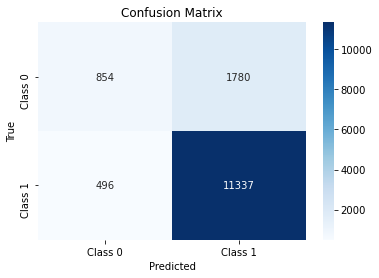

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


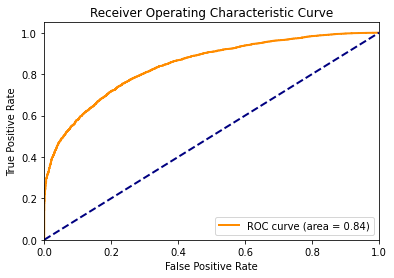

In [131]:
from sklearn.metrics import roc_curve, auc
'''ROC Curve (Receiver Operating Characteristic Curve)'''

fpr, tpr, _ = roc_curve(y_test, nn_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


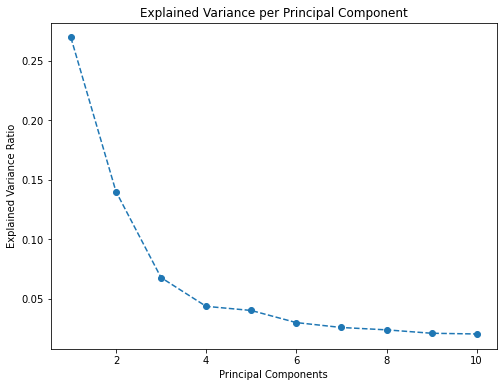

In [132]:
'''Feature Importance (Permutation or PCA Components)'''
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title("Explained Variance per Principal Component")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()


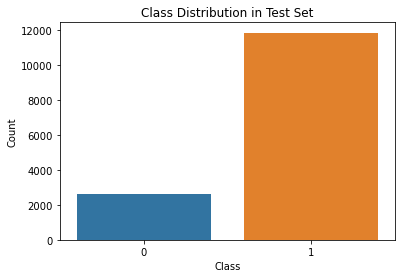

In [133]:
'''Class Distribution in the Test Set
'''
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test)
plt.title('Class Distribution in Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## This is for SelectKBest which selects features based on statistical tests like ANOVA F-values.

In [134]:
# Feature Selection (SelectKBest)
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 features based on F-statistic
selector = SelectKBest(f_classif, k=10)  
X_reduced = selector.fit_transform(X_scaled, y)

# Train-test split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Neural Network Model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers: 100 and 50 neurons
    activation='relu',             # ReLU activation for hidden layers
    solver='adam',                 # Adam optimizer
    alpha=0.4,                    # L2 regularization strength -------edited this from 0.02
    max_iter=200,                  # Max iterations for convergence
    random_state=42,               # For reproducibility
    early_stopping=True,           # Stop early if validation score stops improving
    validation_fraction=0.2        # Fraction of training data for validation
)

# Train the model
nn_model.fit(X_train, y_train)

# Predictions
y_pred = nn_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.997995437893136
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2634
           1       1.00      1.00      1.00     11833

    accuracy                           1.00     14467
   macro avg       1.00      0.99      1.00     14467
weighted avg       1.00      1.00      1.00     14467



Output from ChatGPT:

The output you've provided indicates an almost perfect model performance. Specifically:

Accuracy:
Accuracy: 0.9999 — This means that the model correctly predicted about 99.99% of the test samples.

Precision, Recall, and F1-Score:
Precision and Recall for both classes (0 and 1) are both 1.00, which is perfect.
Precision indicates how many of the positive predictions (class 1) were actually correct.
Recall indicates how many of the actual positive cases (class 1) were correctly predicted.
F1-Score is also 1.00, which is the harmonic mean of precision and recall. A score of 1.00 means perfect performance.

Support:
Support shows the number of samples for each class in the test set (2634 samples for class 0 and 11833 samples for class 1). The support values are proportional to the size of the dataset.

Macro and Weighted Averages:
Macro average: This is the average of precision, recall, and F1-score across all classes, treating all classes equally (not weighted by the number of samples per class). Here, it's also 1.00, which means the model performs perfectly for both classes.
Weighted average: This takes the number of samples in each class into account, so it’s also 1.00, meaning the model performs well across the entire dataset, weighted by class prevalence.

Possible Causes of Such Perfect Scores:
Overfitting: The model might be overfitting the training data, especially if it achieves perfect accuracy on the test set. This can happen if the model is too complex or the dataset is too simple or imbalanced.
Data Leakage: There could be data leakage in the dataset, meaning that information from the test set is inadvertently included in the training process. This can lead to unrealistically high performance metrics.
Class Imbalance: If one class (in your case, class 1) is overwhelmingly larger than the other, the model might predict the majority class almost all the time and still achieve high accuracy, precision, and recall. It’s important to check if the dataset is balanced and whether the model is actually learning meaningful patterns, or just memorizing the majority class.

Next Steps:
Check for Data Leakage: Ensure that no information from the test set is being included in the training process.
Cross-Validation: Use k-fold cross-validation to evaluate model performance across different subsets of data and avoid overfitting.
Class Distribution: Check if the dataset is imbalanced. If it is, consider using techniques like SMOTE or adjusting the class weights in the model.
Let me know if you'd like help with any of these steps!

### Figures for selectKPredict

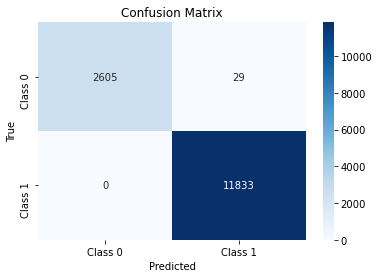

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

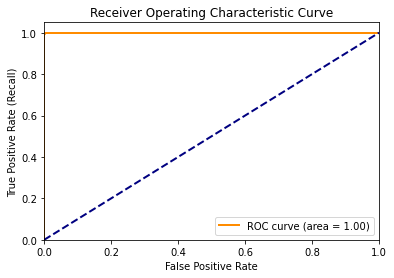

In [136]:
'''ROC Curve'''
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, nn_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


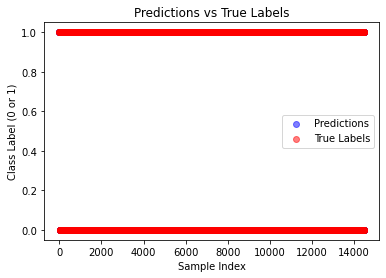

In [137]:
'''Prediction versus True Labels Plot'''
plt.scatter(range(len(y_test)), y_pred, label="Predictions", color="blue", alpha=0.5)
plt.scatter(range(len(y_test)), y_test, label="True Labels", color="red", alpha=0.5)
plt.xlabel("Sample Index")
plt.ylabel("Class Label (0 or 1)")
plt.legend()
plt.title("Predictions vs True Labels")
plt.show()


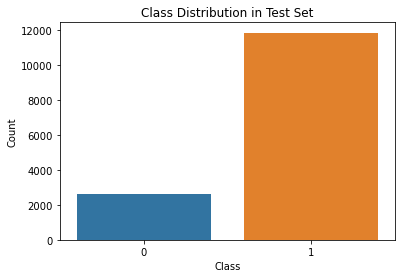

In [138]:
'''Class Distribution in the Test Set
'''
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test)
plt.title('Class Distribution in Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## In regards to regularization

Instead, regularization in your current setup is done through the alpha parameter in the MLPClassifier from sklearn.neural_network. Here's a breakdown of the regularization being applied:
MLPClassifier and Regularization: The MLPClassifier in your code uses the alpha parameter, which controls L2 regularization (also known as weight decay). This is applied to the weights during training to help prevent overfitting. The alpha parameter works by adding a penalty to the loss function, which helps to shrink the model's weights, making them smaller and reducing the model's complexity.

Alpha (L2 Regularization): The alpha parameter is set to 0.001 in your code, which means a small amount of L2 regularization is being applied. A larger value of alpha would apply stronger regularization, while a smaller value (closer to 0) would reduce the impact of regularization.
What does L2 regularization do?: L2 regularization adds a penalty equal to the sum of the squares of the weights, scaled by the alpha parameter, to the loss function. This discourages the model from assigning too much importance to any individual feature, which helps prevent overfitting by reducing the complexity of the model.
- So this was before. I decided to change both of them to be higher alpha parameter so that we had more affect on the model

Early Stopping: You also have early stopping enabled with the early_stopping=True and validation_fraction=0.2. This can also act as a form of regularization. It monitors the model's performance on a validation set and stops training if the performance does not improve, which can help prevent overfitting by stopping before the model becomes too complex and starts to memorize the data.